<a href="https://colab.research.google.com/github/TakumiML/stainless/blob/main/stainless_alglism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np


train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stainless/train.tsv', sep='\t')
test  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stainless/test.tsv', sep='\t')
sample  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stainless/sample_submit.csv',header=None)

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(train, test_size=0.2, random_state = 0)

#訓練データを説明変数データ(X_train)と目的変数データ(y_train)に分割
X_train = train_set.drop('Class', axis=1)
y_train = train_set[['Class']]

#評価データを説明変数データ(X_train)と目的変数データ(y_train)に分割
X_test = test_set.drop('Class', axis=1)
y_test = test_set[['Class']]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(776, 28)
(194, 28)
(776, 1)
(194, 1)


In [ ]:
#Classが1~７の分類のため、-1する
y_train['Class'] -= 1
y_test['Class'] -= 1
y_test

<ipython-input-4-ddc4d2b34341>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['Class'] -= 1
<ipython-input-4-ddc4d2b34341>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Class'] -= 1


,Class
933,5
279,0
14,2
681,1
458,0
...,...
580,2
489,6
18,0
420,5


In [ ]:
X_train

,Unnamed: 0,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
196,383,1641,1666,1606625,1606671,652,49,48,56018,73,...,0.0148,0.5102,0.9583,1.0,2.8142,1.3979,1.6628,0.4565,-0.3288,0.9965
452,894,61,99,4757479,4757628,1970,210,181,29002,0,...,0.0282,0.1810,0.8232,1.0,3.2945,1.5798,2.1732,0.7450,-0.8850,1.0000
799,1608,60,181,239041,239088,3324,157,85,343029,42,...,0.0890,0.7707,0.5529,0.0,3.5217,2.0828,1.6721,-0.6116,-0.1938,1.0000
62,127,595,607,140744,140756,100,15,12,11247,85,...,0.0071,0.8000,1.0000,0.5,2.0000,1.0792,1.0792,0.0000,-0.1213,0.2583
79,160,559,592,274608,274631,460,52,41,54324,103,...,0.0195,0.6346,0.5610,0.0,2.6628,1.5185,1.3617,-0.3030,-0.0774,0.9546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1676,1291,1305,4046506,4046520,131,16,15,13742,95,...,0.0104,0.8750,0.9333,0.5,2.1173,1.1461,1.1461,0.0000,-0.1805,0.3300
192,375,1207,1214,882674,882712,120,35,39,15035,118,...,0.0051,0.2000,0.9744,1.0,2.0792,0.8451,1.5798,0.8158,-0.0212,0.4399
629,1267,41,184,299413,299460,3936,182,93,407075,38,...,0.1050,0.7857,0.5054,0.0,3.5951,2.1553,1.6721,-0.6713,-0.1920,1.0000
559,1134,338,348,2032058,2032067,57,11,9,6135,89,...,0.0073,0.9091,1.0000,0.0,1.7559,1.0000,0.9542,-0.1000,-0.1591,0.1954


# 深層学習


In [ ]:
import tensorflow as tf
from keras.utils import to_categorical

# モデルの構築
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(28),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')
])
# モデルのコンパイル
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# モデルの学習
result = model.fit(X_train.values, to_categorical(y_train.values, num_classes=7), batch_size=32, epochs=500, validation_data=(X_test.values, to_categorical(y_test.values, num_classes=7)), verbose=1)



Epoch 1/500
25/25 [==============================] - 3s 21ms/step - loss: 235489.1406 - accuracy: 0.2629 - val_loss: 50644.3047 - val_accuracy: 0.4948
Epoch 2/500
25/25 [==============================] - 0s 8ms/step - loss: 38560.1250 - accuracy: 0.3376 - val_loss: 2254.6531 - val_accuracy: 0.4794
Epoch 3/500
25/25 [==============================] - 0s 5ms/step - loss: 2803.6282 - accuracy: 0.4124 - val_loss: 449.2401 - val_accuracy: 0.4588
Epoch 4/500
25/25 [==============================] - 0s 3ms/step - loss: 2472.3335 - accuracy: 0.4098 - val_loss: 282.5010 - val_accuracy: 0.4485
Epoch 5/500
25/25 [==============================] - 0s 4ms/step - loss: 1572.7094 - accuracy: 0.4227 - val_loss: 142.3786 - val_accuracy: 0.4381
Epoch 6/500
25/25 [==============================] - 0s 3ms/step - loss: 722.6159 - accuracy: 0.3969 - val_loss: 193.0697 - val_accuracy: 0.4175
Epoch 7/500
25/25 [==============================] - 0s 5ms/step - loss: 662.5519 - accuracy: 0.3969 - val_loss: 143.0

In [ ]:
# model.evaluateを使用し、学習を終えたモデルの誤差と精度を呼び出し
train_score = model.evaluate(X_train.values, to_categorical(y_train.values, num_classes=7))
test_score = model.evaluate(X_test.values, to_categorical(y_test.values, num_classes=7))
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

7/7 [==============================] - 0s 3ms/step - loss: 3.2564 - accuracy: 0.3402
Train loss: 1.8786473274230957
Train accuracy: 0.3543814420700073
Test loss: 3.2564265727996826
Test accuracy: 0.34020617604255676


# ランダムフォレスト

In [ ]:
# グリットサーチ
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# 検証したいパラメータの指定
search_gs = {
"max_depth": [None, 5, 25],
"n_estimators":[150, 180],
"min_samples_split": [4, 8, 12],
"max_leaf_nodes": [None, 10, 30],
}

model_gs = RandomForestClassifier(class_weight='balanced')
# グリットサーチの設定
gs = GridSearchCV(model_gs,
                  search_gs,
                  cv = 5,
                  )
# 学習
gs.fit(X_train.values,np.ravel(y_train.values))
# 最適なパラメータの表示
print(gs.best_params_)

{'max_depth': None, 'max_leaf_nodes': None, 'min_samples_split': 4, 'n_estimators': 150}


In [ ]:
# 評価
from sklearn import metrics
clf_rand = RandomForestClassifier(max_depth = None,
                                  max_leaf_nodes = None,
                                  min_samples_split = 4,
                                  n_estimators =180)
model_rand = clf_rand.fit(X_train, y_train)
pred_rand = model_rand.predict(X_test)

print(metrics.classification_report(y_test, pred_rand))

<ipython-input-30-cdd12ad7ae1d>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rand = clf_rand.fit(X_train, y_train)


              precision    recall  f1-score   support

           0       0.77      0.67      0.71        15
           1       1.00      0.91      0.95        22
           2       0.97      0.89      0.93        35
           3       0.60      1.00      0.75         3
           4       0.78      0.78      0.78         9
           5       0.53      0.38      0.44        42
           6       0.60      0.75      0.67        68

    accuracy                           0.71       194
   macro avg       0.75      0.77      0.75       194
weighted avg       0.72      0.71      0.71       194



In [ ]:
y_pred = model_rand.predict(test)

In [ ]:
y_pred

array([5, 3, 6, 6, 1, 3, 6, 2, 6, 1, 5, 5, 5, 2, 6, 1, 6, 6, 6, 5, 4, 5,
       2, 0, 2, 3, 5, 6, 5, 2, 5, 5, 6, 6, 6, 6, 6, 5, 1, 0, 6, 6, 0, 6,
       5, 6, 2, 5, 4, 0, 6, 5, 2, 5, 6, 2, 5, 2, 6, 5, 5, 1, 5, 5, 2, 5,
       2, 6, 3, 6, 6, 6, 6, 6, 5, 6, 6, 6, 1, 5, 6, 6, 1, 6, 6, 5, 1, 6,
       6, 6, 5, 5, 1, 2, 6, 6, 5, 5, 3, 5, 1, 5, 1, 0, 5, 2, 6, 1, 5, 6,
       6, 6, 6, 1, 1, 5, 6, 2, 6, 6, 6, 6, 2, 6, 6, 6, 2, 0, 6, 2, 6, 5,
       1, 5, 1, 2, 6, 5, 5, 6, 6, 5, 2, 2, 6, 6, 3, 2, 6, 6, 6, 5, 4, 6,
       6, 6, 6, 6, 6, 6, 5, 2, 6, 6, 6, 5, 4, 6, 6, 5, 0, 5, 6, 6, 6, 6,
       2, 2, 6, 6, 6, 0, 5, 1, 6, 0, 2, 5, 6, 0, 0, 6, 5, 6, 6, 6, 6, 5,
       6, 6, 6, 6, 1, 0, 2, 1, 2, 2, 6, 5, 6, 2, 5, 5, 6, 2, 3, 5, 6, 6,
       0, 6, 2, 2, 5, 6, 5, 3, 6, 5, 6, 6, 2, 2, 5, 0, 2, 5, 6, 6, 2, 6,
       6, 2, 6, 3, 1, 6, 6, 6, 5, 1, 6, 6, 5, 2, 1, 2, 6, 4, 6, 6, 6, 5,
       6, 6, 5, 1, 0, 6, 6, 2, 5, 6, 6, 5, 6, 6, 5, 6, 3, 2, 5, 1, 6, 6,
       2, 6, 6, 6, 3, 6, 2, 5, 6, 1, 6, 6, 0, 0, 5,

In [ ]:
#0~6の出力を1~7に戻す
sample[1] = y_pred + 1

In [ ]:
sample.to_csv('submit_stainless6.csv', index=None, header=None)

# XGBoost

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train , label=y_train)
dvalid = xgb.DMatrix(X_test, label=y_test)
param = {'max_depth': 2, 'eta': 0.5, 'objective': 'multi:softmax', 'num_class': 7, 'eval_metric': 'mlogloss'}


In [ ]:
evallist = [(dvalid, 'eval'), (dtrain, 'train')]
num_round = 1000000
bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=5)

[0]	eval-mlogloss:1.37592	train-mlogloss:1.31556
[1]	eval-mlogloss:1.17012	train-mlogloss:1.07964
[2]	eval-mlogloss:1.06447	train-mlogloss:0.93779
[3]	eval-mlogloss:0.98562	train-mlogloss:0.83664


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Streaming output truncated to the last 5000 lines.
[45546]	eval-mlogloss:1.51221	train-mlogloss:0.00196
[45547]	eval-mlogloss:1.51222	train-mlogloss:0.00196
[45548]	eval-mlogloss:1.51221	train-mlogloss:0.00196
[45549]	eval-mlogloss:1.51223	train-mlogloss:0.00196
[45550]	eval-mlogloss:1.51221	train-mlogloss:0.00196
[45551]	eval-mlogloss:1.51224	train-mlogloss:0.00196
[45552]	eval-mlogloss:1.51222	train-mlogloss:0.00196
[45553]	eval-mlogloss:1.51224	train-mlogloss:0.00196
[45554]	eval-mlogloss:1.51223	train-mlogloss:0.00196
[45555]	eval-mlogloss:1.51224	train-mlogloss:0.00196
[45556]	eval-mlogloss:1.51223	train-mlogloss:0.00196
[45557]	eval-mlogloss:1.51225	train-mlogloss:0.00196
[45558]	eval-mlogloss:1.51224	train-mlogloss:0.00196
[45559]	eval-mlogloss:1.51225	train-mlogloss:0.00196
[45560]	eval-mlogloss:1.51224	train-mlogloss:0.00196
[45561]	eval-mlogloss:1.51225	train-mlogloss:0.00196
[45562]	eval-mlogloss:1.51224	train-mlogloss:0.00196
[45563]	eval-mlogloss:1.51225	train-mlogloss:0.0

In [ ]:
dtest = xgb.DMatrix(X_test)
pred = bst.predict(dtest)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

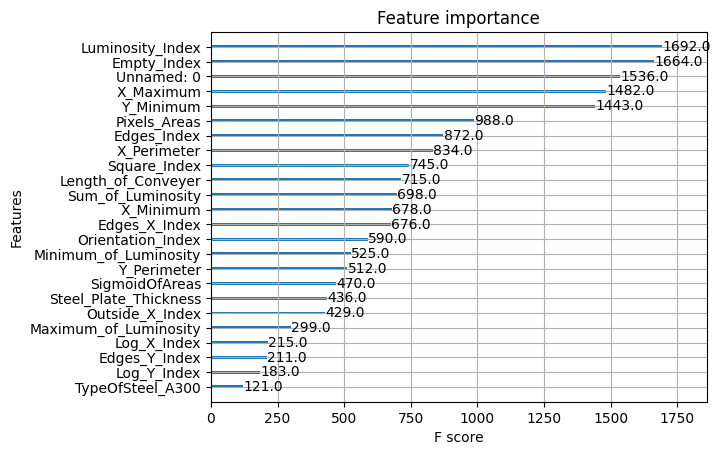

In [ ]:
xgb.plot_importance(bst)

In [ ]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, pred)
print('score:{0:.4f}'.format(score))

score:0.7165


In [ ]:
dtest = xgb.DMatrix(test)
pred = bst.predict(dtest)

In [ ]:
pd.DataFrame(pred)

,0
0,5.0
1,3.0
2,2.0
3,6.0
4,6.0
...,...
966,2.0
967,6.0
968,1.0
969,5.0


In [ ]:
#0~6の出力を1~7に戻す
sample[1] = pred.astype(int) + 1
sample.to_csv('submit_stainless7.csv', index=None, header=None)

In [ ]:
sample

,0,1
0,1,6
1,2,4
2,4,3
3,5,7
4,6,7
...,...,...
966,1934,3
967,1936,7
968,1937,2
969,1938,6


# SVM

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
C = 1.
kernel = 'rbf'
gamma  = 0.01

In [ ]:
estimator = SVC(C=C, kernel=kernel, gamma=gamma)
classifier = OneVsRestClassifier(estimator)
classifier.fit(X_train, y_train)
pred_y = classifier.predict(X_test)

In [ ]:
classifier2 = SVC(C=C, kernel=kernel, gamma=gamma)
classifier2.fit(X_train, y_train)
pred_y2 = classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print('One-versus-the-rest: {:.5f}'.format(accuracy_score(y_test, pred_y)))
print('One-versus-one: {:.5f}'.format(accuracy_score(y_test, pred_y2)))


One-versus-the-rest: 0.35052
One-versus-one: 0.35052
